In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from io import StringIO
import scipy.special as scp
from scipy.optimize import curve_fit 


%matplotlib inline
sns.set_style("whitegrid", {'grid.linestyle': '--'})
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [6]:
df = pd.concat([pd.read_csv(f, skiprows=1) for f in glob.glob('SL8_aspect_*.csv')], ignore_index = True, sort=False)

In [7]:
df.columns = [x.strip() for x in df.columns]

df.loc[df.AR_study_number==3, 'x_apex'] = 108.647616/1000
df.loc[df.AR_study_number==4, 'x_apex']= 95.066664/1000
df.loc[df.AR_study_number==5, 'x_apex']= 81.485712/1000
df.loc[df.AR_study_number==6, 'x_apex'] = 67.90476/1000
df.loc[df.AR_study_number==7, 'x_apex'] = 54.323808/1000
df.loc[df.AR_study_number==8, 'x_apex'] = 40.742856/1000


In [8]:
df['x_apex'].tail()

394   0.04074286
395   0.04074286
396   0.04074286
397   0.04074286
398   0.04074286
Name: x_apex, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Eval #                    399 non-null    int64  
 1   Force_Coef_0              399 non-null    float64
 2   Force_Coef_5              399 non-null    float64
 3   Force_Coef_10             399 non-null    float64
 4   Frontal_Area_1            399 non-null    float64
 5   Aspect_Ratio              399 non-null    float64
 6   chord_length              399 non-null    float64
 7   Surfacel_Area_top_record  399 non-null    float64
 8   SA_ratio_Venge            399 non-null    float64
 9   scaled_x                  399 non-null    float64
 10  y_tail2                   399 non-null    float64
 11  TR_2                      399 non-null    float64
 12  y_tail2_scaled            399 non-null    float64
 13  AR_TR2                    399 non-null    float64
 14  new_Re    

In [18]:
df.head()

Eval #  Force_Coef_0  Force_Coef_5  Force_Coef_10  Frontal_Area_1  \
0       1    0.17625466    0.16173106     0.20130808      0.02376439   
1       2    0.17778474    0.15839152     0.20462160      0.02376686   
2       3    0.17717719    0.14978029     0.20063430      0.02376687   
3       4    0.17651971    0.14947420     0.19532392      0.02376258   
4       5    0.17940898    0.14473668     0.19342597      0.02376479   

   Aspect_Ratio  chord_length  Surfacel_Area_top_record  SA_ratio_Venge  \
0    3.00003000    1.00000000             3578.83101400      1.10803152   
1    2.97058526    0.99018518             3576.94445900      1.10744743   
2    2.94114052    0.98037037             3574.27457900      1.10662082   
3    2.91169578    0.97055556             3570.30994000      1.10539334   
4    2.88225104    0.96074074             3565.11953700      1.10378635   

    scaled_x  ...  y_tail2_scaled       AR_TR2          new_Re  \
0 0.13200000  ...      0.00092399 142.85857140 112777.76810000   
1 0.13070444  ...      0.00192777  67.80082250 111670.87520000   
2 0.12940889  ...      0.00291953  44.32530782 110563.98230000   
3 0.12811333  ...      0.00389950  32.85380816 109457.08940000   
4 0.12681778  ...      0.00486791  26.05177034 108350.19650000   

   kinematic_viscosity2  AR_study_number  airfoil_scaling_X    my_mach  \
0            0.00001568                3         0.13200000 0.03906700   
1            0.00001568                3         0.13200000 0.03906700   
2            0.00001568                3         0.13200000 0.03906700   
3            0.00001568                3         0.13200000 0.03906700   
4            0.00001568                3         0.13200000 0.03906700   

   velocity_inlet     y_apex     x_apex  
0     13.40000000 0.33333000 0.10864762  
1     13.40000000 0.33333000 0.10864762  
2     13.40000000 0.33333000 0.10864762  
3     13.40000000 0.33333000 0.10864762  
4     13.40000000 0.33333000 0.10864762  

[5 rows x 22 columns]

In [10]:
df.columns = [x.strip() for x in df.columns]

Text(0.5, 0, 'Reynolds number')

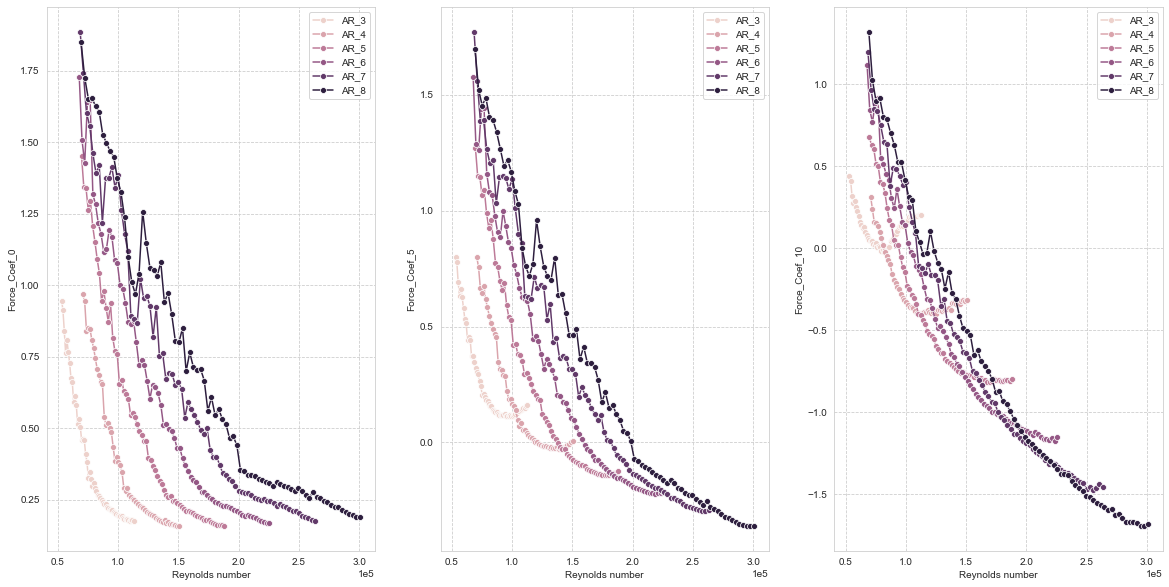

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(20,10))
#plt.figure(figsize=(20,10)) 

sns.lineplot('new_Re', 'Force_Coef_0' , data=df, hue="AR_study_number",  marker="o", ax =ax1)
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax1.set_xlabel('Reynolds number')

sns.lineplot('new_Re', 'Force_Coef_5' , data=df, hue="AR_study_number",  marker="o", ax =ax2)
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax2.set_xlabel('Reynolds number')

sns.lineplot('new_Re', 'Force_Coef_10' , data=df, hue="AR_study_number",  marker="o", ax =ax3)
ax3.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax3.set_xlabel('Reynolds number')


In [13]:
fig, (ax4, ax5, ax6) = plt.subplots(ncols=3, sharey=False, figsize=(20,10))
#plt.figure(figsize=(20,10)) 

sns.lineplot('AR_TR2', 'Force_Coef_0' , data=df, hue="AR_study_number",  marker="o", ax =ax4)
ax4.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax4.set_xlabel('AspectRatio x TailRatio')
ax4.set_xscale('log')

sns.lineplot('AR_TR2', 'Force_Coef_5' , data=df, hue="AR_study_number",  marker="o", ax =ax5)
ax5.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax5.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax5.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax5.set_xlabel('AspectRatio x TailRatio')
ax5.set_xscale('log')

sns.lineplot('AR_TR2', 'Force_Coef_10' , data=df, hue="AR_study_number",  marker="o", ax =ax6)
ax6.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax6.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax6.set_xlabel('AspectRatio x TailRatio')
ax6.set_xscale('log')


In [17]:
df['Force_Coef_0'].max()

1.8865765730000001

In [18]:
df['F0_normalized'] = ""
study_list= [3, 4, 5, 6, 7, 8]
for x in study_list:
    df['F0_normalized'][df['AR_study_number']==x] = df['Force_Coef_0']/df['Force_Coef_0'].max()

C:\Users\msuzuki\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Eval #                    399 non-null    int64  
 1   Force_Coef_0              399 non-null    float64
 2   Force_Coef_5              399 non-null    float64
 3   Force_Coef_10             399 non-null    float64
 4   Frontal_Area_1            399 non-null    float64
 5   Aspect_Ratio              399 non-null    float64
 6   chord_length              399 non-null    float64
 7   Surfacel_Area_top_record  399 non-null    float64
 8   SA_ratio_Venge            399 non-null    float64
 9   scaled_x                  399 non-null    float64
 10  y_tail2                   399 non-null    float64
 11  TR_2                      399 non-null    float64
 12  y_tail2_scaled            399 non-null    float64
 13  AR_TR2                    399 non-null    float64
 14  new_Re    

In [21]:
df_melted = pd.melt(df, id_vars=['AR_TR2', 'AR_study_number', 'Surfacel_Area_top_record'], value_vars=['Force_Coef_10', 'Force_Coef_5', 'Force_Coef_0'],
...         var_name='Cd_name', value_name='Cd')

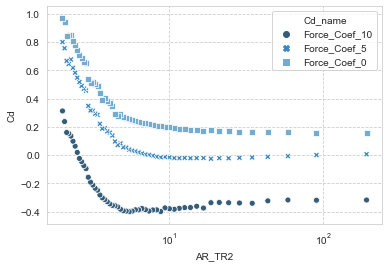

In [22]:
data = df_melted[df_melted['AR_study_number']==4]
ax = sns.scatterplot(x=data.AR_TR2, y=data.Cd, hue=data.Cd_name, style=data.Cd_name, palette='Blues_d')
ax.set_xscale('log')

Text(0.5, 0, 'AspectRatio')

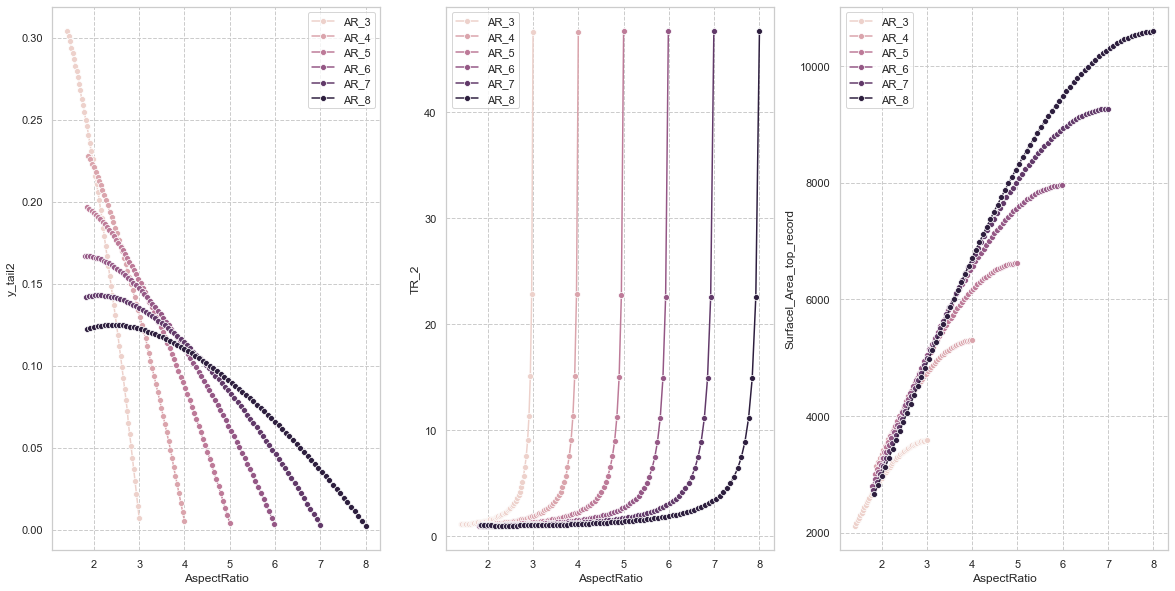

In [116]:
fig, (ax7, ax8, ax9) = plt.subplots(ncols=3, sharey=False, figsize=(20,10))
#plt.figure(figsize=(20,10)) 

sns.lineplot('Aspect_Ratio', 'y_tail2' , data=df, hue="AR_study_number",  marker="o", ax =ax7)
ax7.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax7.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax7.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax7.set_xlabel('AspectRatio')
#ax7.set_xscale('log')

sns.lineplot('Aspect_Ratio', 'TR_2' , data=df, hue="AR_study_number",  marker="o", ax =ax8)
ax8.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax8.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax8.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax8.set_xlabel('AspectRatio')
#ax8.set_xscale('log')

sns.lineplot('Aspect_Ratio', 'Surfacel_Area_top_record' , data=df, hue="AR_study_number",  marker="o", ax =ax9)
ax9.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax9.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax9.legend(labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])
ax9.set_xlabel('AspectRatio')
#ax9.set_xscale('log')

In [122]:
ax10 = sns.lineplot('AR_TR2', 'Surfacel_Area_top_record' , data=df, hue="AR_study_number",  marker="o")
ax10.set_xscale('log')
ax10.legend(loc='upper left',labels=["AR_3","AR_4","AR_5", 'AR_6', 'AR_7', 'AR_8'])

Normalize the data : 
normalized value/data = (data -min)/(max-min)


In [26]:
data = df_melted[df_melted['AR_study_number']==4]
normalized_data = (data.Cd-data.Cd.min())/(data.Cd.max()-data.Cd.min())

In [30]:
data.head()

AR_TR2  AR_study_number  Surfacel_Area_top_record        Cd_name  \
55 190.47619050                4             5300.58898700  Force_Coef_10   
56  90.40019266                4             5298.71811000  Force_Coef_10   
57  59.09981942                4             5294.05777400  Force_Coef_10   
58  43.80463949                4             5288.83288300  Force_Coef_10   
59  34.73534642                4             5280.42779200  Force_Coef_10   

            Cd  
55 -0.31853613  
56 -0.31999386  
57 -0.31840828  
58 -0.32443216  
59 -0.34151117

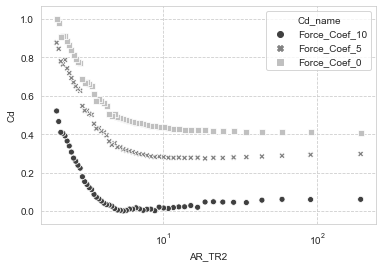

In [25]:
ax = sns.scatterplot(x=data.AR_TR2, y=normalized_data, hue=data.Cd_name, style=data.Cd_name, palette='gist_gray')
ax.set_xscale('log')

In [33]:
df_melted = pd.melt(df, id_vars=['AR_TR2', 'AR_study_number', 'Surfacel_Area_top_record', 'Force_Coef_10', 'Force_Coef_5', 'Force_Coef_0'], value_vars=['Aspect_Ratio'],
...         var_name='AspectRatio', value_name='AR')

In [34]:
df_melted.head()

AR_TR2  AR_study_number  Surfacel_Area_top_record  Force_Coef_10  \
0 142.85857140                3             3578.83101400     0.20130808   
1  67.80082250                3             3576.94445900     0.20462160   
2  44.32530782                3             3574.27457900     0.20063430   
3  32.85380816                3             3570.30994000     0.19532392   
4  26.05177034                3             3565.11953700     0.19342597   

   Force_Coef_5  Force_Coef_0   AspectRatio         AR  
0    0.16173106    0.17625466  Aspect_Ratio 3.00003000  
1    0.15839152    0.17778474  Aspect_Ratio 2.97058526  
2    0.14978029    0.17717719  Aspect_Ratio 2.94114052  
3    0.14947420    0.17651971  Aspect_Ratio 2.91169578  
4    0.14473668    0.17940898  Aspect_Ratio 2.88225104

In [61]:
data_venge = df_melted[(df_melted['AR']<2.4) & (df_melted['AR']>1.9) ]

In [60]:
data_venge[data_venge['Force_Coef_0']<1.0]

AR_TR2  AR_study_number  Surfacel_Area_top_record  Force_Coef_10  \
28  3.82295115                3             3131.91636800    -0.02499445   
29  3.66574854                3             3101.91088500    -0.01390527   
30  3.51838839                3             3071.23449800    -0.01773413   
31  3.37995280                3             3039.53759800     0.00665343   
32  3.24963528                3             3007.32995100     0.01393337   
33  3.12672433                3             2974.50131000     0.00457264   
34  3.01058979                3             2940.45042500     0.03167269   
35  2.90067156                3             2905.53522600     0.02140113   
36  2.79647004                3             2869.99269800     0.02535802   
37  2.69753817                3             2833.99625200     0.04158864   
101 2.65237674                4             3671.55165100    -0.02408079   
102 2.56831904                4             3607.74066800     0.01881012   
103 2.48750736                4             3543.04287300     0.06269907   
104 2.40974866                4             3477.51790800     0.09795619   
105 2.33486469                4             3411.34935400     0.13428746   
106 2.26269058                4             3344.42557600     0.15245179   
107 2.19307349                4             3277.12142200     0.15971278   
108 2.12587153                4             3208.52375900     0.23693821   

     Force_Coef_5  Force_Coef_0   AspectRatio         AR  
28     0.15929065    0.27921232  Aspect_Ratio 2.17557731  
29     0.16545294    0.29217672  Aspect_Ratio 2.14613257  
30     0.17906281    0.30853994  Aspect_Ratio 2.11668783  
31     0.18268702    0.29814433  Aspect_Ratio 2.08724309  
32     0.19453661    0.32268911  Aspect_Ratio 2.05779836  
33     0.21045891    0.34568069  Aspect_Ratio 2.02835362  
34     0.20600262    0.32701713  Aspect_Ratio 1.99890888  
35     0.24251399    0.38308394  Aspect_Ratio 1.96946414  
36     0.26636104    0.41001631  Aspect_Ratio 1.94001940  
37     0.29690519    0.45856112  Aspect_Ratio 1.91057466  
101    0.51718082    0.70873232  Aspect_Ratio 2.19407407  
102    0.54778822    0.74415500  Aspect_Ratio 2.15481481  
103    0.58278865    0.78186949  Aspect_Ratio 2.11555556  
104    0.61700968    0.80937296  Aspect_Ratio 2.07629630  
105    0.67622893    0.84759359  Aspect_Ratio 2.03703704  
106    0.64497296    0.84921950  Aspect_Ratio 1.99777778  
107    0.66640782    0.84185758  Aspect_Ratio 1.95851852  
108    0.75604004    0.94344173  Aspect_Ratio 1.91925926

In [ ]:
data_venge.

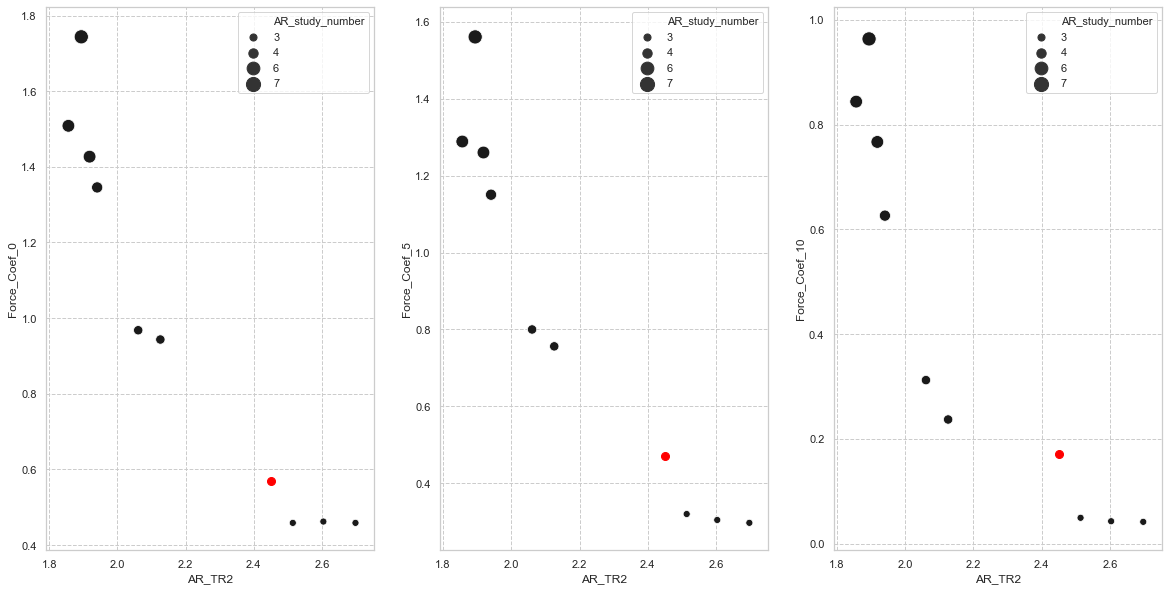

In [239]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(20,10))
#plt.figure(figsize=(20,10)) 

ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
sns.scatterplot(x=data_venge.AR_TR2, y=data_venge.Force_Coef_0, ax=ax1, color='k', size=data_venge.AR_study_number, sizes=(50, 200))
ax1.plot(2.45, 0.568, marker='o', markersize=8, color="red")


sns.scatterplot(x=data_venge.AR_TR2, y=data_venge.Force_Coef_5, ax=ax2, color='k',size=data_venge.AR_study_number, sizes=(50, 200))
ax2.plot(2.45, 0.472, marker='o', markersize=8, color="red")

sns.scatterplot(x=data_venge.AR_TR2, y=data_venge.Force_Coef_10, ax=ax3, color='k', size=data_venge.AR_study_number, sizes=(50, 200))
ax3.plot(2.45, 0.172, marker='o', markersize=8, color="red")


In [12]:
data_shiv = df_melted[(df_melted['AR']<3.8) & (df_melted['AR']>3.7) ]

NameError: name 'df_melted' is not defined

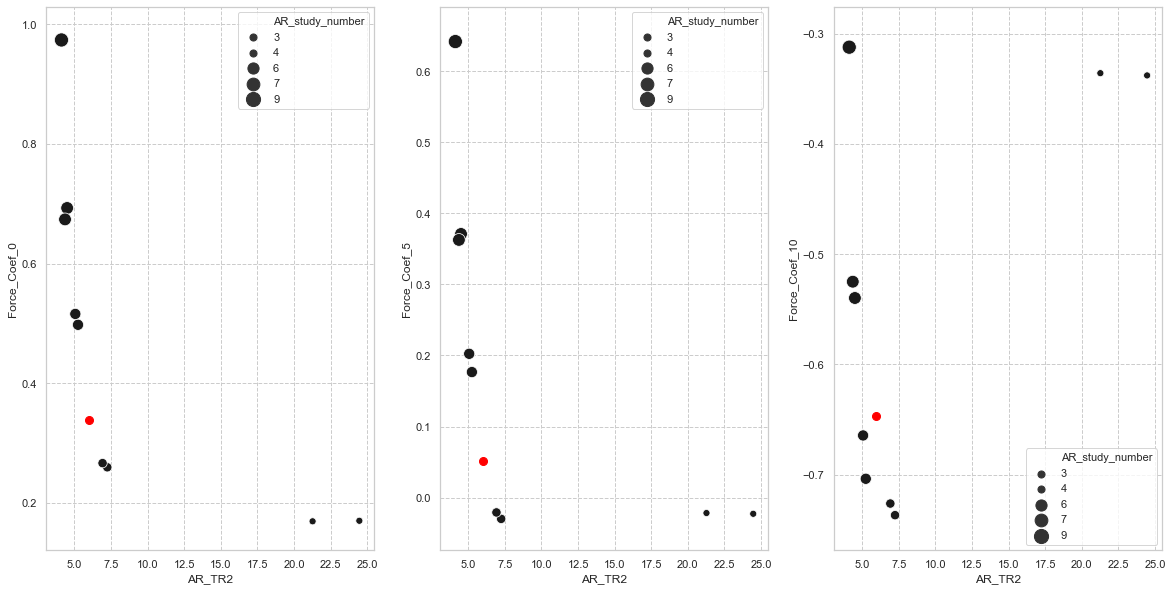

In [241]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=False, figsize=(20,10))
#plt.figure(figsize=(20,10)) 

ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
sns.scatterplot(x=data_shiv.AR_TR2, y=data_shiv.Force_Coef_0, ax=ax1, color='k',  size=data_shiv.AR_study_number, sizes=(50, 200))
ax1.plot(5.98, 0.339, marker='o', markersize=8, color="red")

sns.scatterplot(x=data_shiv.AR_TR2, y=data_shiv.Force_Coef_5, ax=ax2, color='k', size=data_shiv.AR_study_number, sizes=(50, 200))
ax2.plot(5.98, 0.0516, marker='o', markersize=8, color="red")

sns.scatterplot(x=data_shiv.AR_TR2, y=data_shiv.Force_Coef_10, ax=ax3, color='k', size=data_shiv.AR_study_number, sizes=(50, 200))
ax3.plot(5.98, -0.647, marker='o', markersize=8, color="red")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 23 columns):
Eval #                      399 non-null int64
Force_Coef_0                399 non-null float64
Force_Coef_5                399 non-null float64
Force_Coef_10               399 non-null float64
Frontal_Area_1              399 non-null float64
Aspect_Ratio                399 non-null float64
chord_length                399 non-null float64
Surfacel_Area_top_record    399 non-null float64
SA_ratio_Venge              399 non-null float64
scaled_x                    399 non-null float64
y_tail2                     399 non-null float64
TR_2                        399 non-null float64
y_tail2_scaled              399 non-null float64
AR_TR2                      399 non-null float64
new_Re                      399 non-null float64
kinematic_viscosity2        399 non-null float64
AR_study_number             399 non-null int64
airfoil_scaling_X           399 non-null float64
my_mach          

In [53]:
df['XR'] = df['x_apex']/df['chord_length']

In [1]:
fig, (ax7, ax8, ax9) = plt.subplots(ncols=3, sharey=False, figsize=(20,10))
#plt.figure(figsize=(20,10)) 

sns.scatterplot('XR', 'TR_2' , data=df, hue="Force_Coef_0", size='AR_study_number', marker="o", ax =ax7)
ax7.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax7.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax7.set_xlabel('XR')
ax7.legend('AR_study_number')

sns.scatterplot('XR', 'Surfacel_Area_top_record' , data=df, hue="Force_Coef_0",  marker="o", ax =ax8)
ax8.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#ax8.ticklabel_format( axis='x', scilimits=(0,0))
ax8.set_xlabel('XR')

sns.scatterplot('XR', 'Force_Coef_0' , data=df, hue="AR_TR2",  marker="o", ax =ax9)
ax9.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#ax9.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax9.set_xlabel('XR')


NameError: name 'plt' is not defined

In [59]:
df['AR_TR2'].max()

380.952381

In [43]:
plt.scatter(x, y )
plt.ylim(-0.1, 0.2)

(-0.1, 0.2)

In [36]:
#Fit ErfC function on the data_set
#try Curve fitting with the error function

df_fit = df[df['AR_study_number']==8]


x = df_fit['AR_TR2']
y = df_fit['Force_Coef_10']
#y = 3.0*scp.erf(x) + np.random.normal(scale = 0.1, size = 40) 


def test(x, a, b): 
#    return a * np.sin(b * x) 
    return a*scp.erf(x)+b

param, param_cov = curve_fit(test, x, y) 


print("Coefficients:") 
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 



Coefficients:
[-388.39153414  387.51664543]
Covariance of coefficients:
[[ 3752.31591279 -3750.98127845]
 [-3750.98127845  3749.65308238]]


In [37]:
# ans stores the new y-data according to  
# the coefficients given by curve-fit() function 
ans = param[0]*(scp.erf(x))+param[1] 
plt.plot(x, y, 'o', color ='red', label ="data") 
plt.plot(x, ans, '--', color ='blue', label ="curve_fit data") 
plt.legend() 
plt.show() 

In [ ]:
#to do --> 
#Normalize the Force_Coef vs. XR_TR 
#Then fit the curve


t